<a href="https://colab.research.google.com/github/chandankr014/passionate/blob/master/livedata_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scraping data 
#### from yahoo finance

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf


In [2]:
# nifty = yf.download(tickers='^NSEI', period='1d', interval='1m')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader


In [4]:
# For time stamps
from datetime import datetime
company_name = ["NIFTY50", "STATE BANK OF INDIA", "TATA STEEL", "ADANI POWER", "HDFC AMC"]
stk_symbol = ['^NSEI', 'SBIN.NS', 'TATASTEEL.NS', 'ADANIPOWER.NS', 'HDFCAMC.NS']
i_stk = 1
prd = '1wk'
ivl = '1m'
stock_data = yf.download(tickers=stk_symbol[i_stk], period=prd, interval=ivl)


[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-20 09:15:00+05:30,525.349976,526.049988,521.000000,523.049988,523.049988,0
2023-03-20 09:16:00+05:30,523.500000,523.650024,521.900024,522.549988,522.549988,158101
2023-03-20 09:17:00+05:30,522.349976,523.500000,522.200012,522.799988,522.799988,86300
2023-03-20 09:18:00+05:30,522.799988,524.450012,522.650024,522.849976,522.849976,74157
2023-03-20 09:19:00+05:30,523.250000,523.799988,522.849976,523.799988,523.799988,46973
...,...,...,...,...,...,...
2023-03-24 15:25:00+05:30,503.899994,504.750000,503.750000,504.700012,504.700012,145607
2023-03-24 15:26:00+05:30,504.500000,504.899994,504.250000,504.899994,504.899994,116427
2023-03-24 15:27:00+05:30,504.850006,505.250000,504.750000,505.149994,505.149994,129397


<Axes: xlabel='Datetime'>

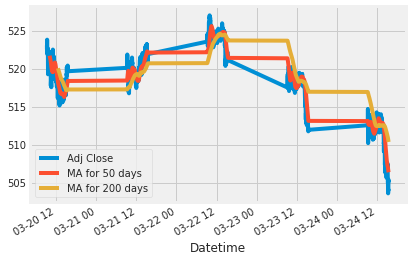

In [6]:
#plotting moving averages
ma_day = [50, 200]

for ma in ma_day:
    for company in stk_symbol:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()
        

stock_data[['Adj Close', 'MA for 50 days', 'MA for 200 days']].plot()#.set_title(company_name[i_stk])


In [7]:
stock_data.dropna()#.drop(['Volume', 'MA for 50 days', 'MA for 200 days'], axis=1, inplace=True)

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days
Datetime,,,,,,,,
2023-03-20 12:34:00+05:30,517.200012,517.250000,516.950012,517.099976,517.099976,19184,518.235999,520.044998
2023-03-20 12:35:00+05:30,517.099976,517.099976,516.400024,516.500000,516.500000,20409,518.187998,520.012248
2023-03-20 12:36:00+05:30,516.450012,516.950012,516.450012,516.700012,516.700012,17902,518.141998,519.982998
2023-03-20 12:37:00+05:30,516.750000,516.799988,516.400024,516.500000,516.500000,14428,518.086998,519.951498
2023-03-20 12:38:00+05:30,516.700012,516.900024,516.450012,516.599976,516.599976,17722,518.038998,519.920248
...,...,...,...,...,...,...,...,...
2023-03-24 15:25:00+05:30,503.899994,504.750000,503.750000,504.700012,504.700012,145607,506.533000,510.525000
2023-03-24 15:26:00+05:30,504.500000,504.899994,504.250000,504.899994,504.899994,116427,506.488000,510.481000
2023-03-24 15:27:00+05:30,504.850006,505.250000,504.750000,505.149994,505.149994,129397,506.444000,510.437750


In [8]:
p_change = stock_data['Adj Close'].pct_change()
stock_data['Daily Return'] = p_change
print(stock_data['Daily Return'])

Datetime
2023-03-20 09:15:00+05:30         NaN
2023-03-20 09:16:00+05:30   -0.000956
2023-03-20 09:17:00+05:30    0.000478
2023-03-20 09:18:00+05:30    0.000096
2023-03-20 09:19:00+05:30    0.001817
                               ...   
2023-03-24 15:25:00+05:30    0.001488
2023-03-24 15:26:00+05:30    0.000396
2023-03-24 15:27:00+05:30    0.000495
2023-03-24 15:28:00+05:30    0.000495
2023-03-24 15:29:00+05:30   -0.000693
Name: Daily Return, Length: 1874, dtype: float64


Text(0.5, 1.0, 'STATE BANK OF INDIA')

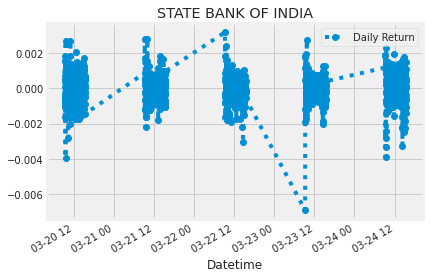

In [9]:
stock_data['Daily Return'].plot(legend=True, linestyle=':', marker='o').set_title(company_name[i_stk])

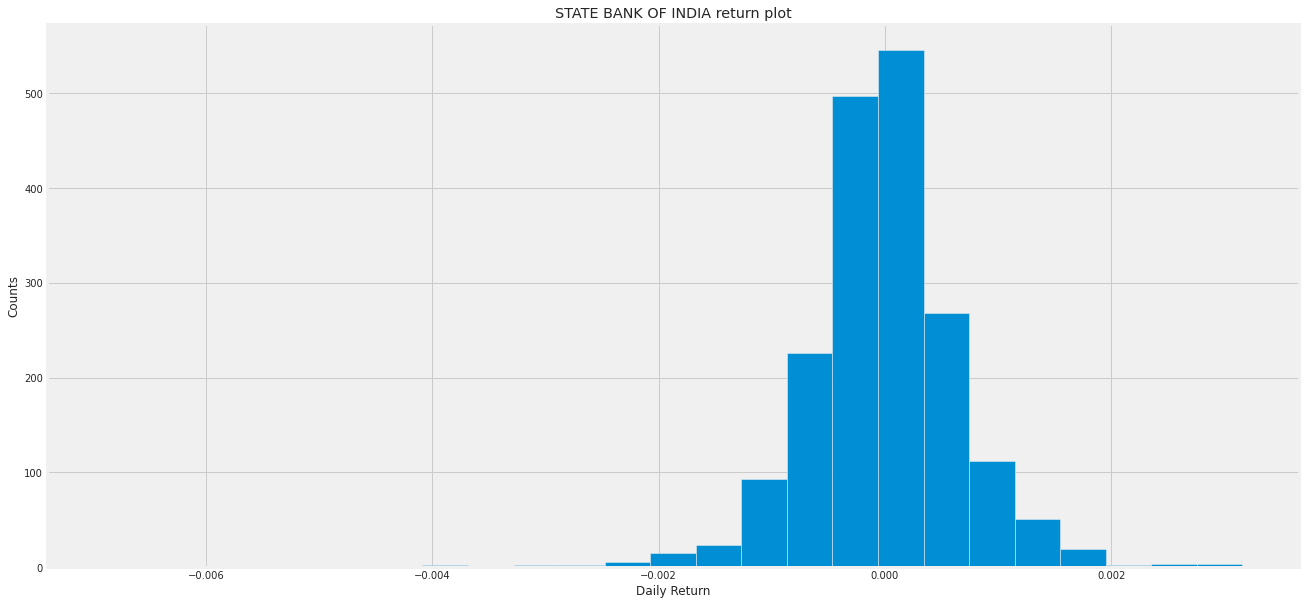

In [10]:
plt.figure(figsize=(20, 10))

stock_data['Daily Return'].hist(bins=25)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'{company_name[i_stk]} return plot')

plt.show()

In [11]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return
Datetime,,,,,,,,,
2023-03-24 15:25:00+05:30,503.899994,504.750000,503.750000,504.700012,504.700012,145607,506.533000,510.52500,0.001488
2023-03-24 15:26:00+05:30,504.500000,504.899994,504.250000,504.899994,504.899994,116427,506.488000,510.48100,0.000396
2023-03-24 15:27:00+05:30,504.850006,505.250000,504.750000,505.149994,505.149994,129397,506.444000,510.43775,0.000495
2023-03-24 15:28:00+05:30,505.100006,505.399994,504.950012,505.399994,505.399994,148545,506.412000,510.39825,0.000495
2023-03-24 15:29:00+05:30,505.250000,505.399994,504.649994,505.049988,505.049988,144490,506.368999,510.35650,-0.000693


In [12]:
dt = stock_data['Adj Close'].tolist()
dt[:4]

[523.0499877929688, 522.5499877929688, 522.7999877929688, 522.8499755859375]

In [ ]:
dt_vol = stock_data['Volume'].tolist()
dt_vol[:4]

In [13]:
norm_dt = [round(float(i) / max(dt), 4) for i in dt]

In [14]:
norm_dt[:10]

[0.9925, 0.9916, 0.992, 0.9921, 0.9939, 0.9923, 0.9916, 0.9909, 0.9914, 0.9918]

In [ ]:
# LAST 1 MONTHS CHART
plt.figure(figsize=(15,5))
plt.title('Close Price History - LAST 1 MONTH', fontweight='bold')
plt.plot(dt[:], label=stk_symbol[i_stk])
plt.legend()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [ ]:
# LAST 1 MONTHS CHART
plt.figure(figsize=(15,5))
plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
plt.plot(dt[:], label=stk_symbol[i_stk])
plt.legend()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

In [16]:
dt_vol = stock_data['Volume'].tolist()
dt_vol[:5]

[0, 158101, 86300, 74157, 46973]

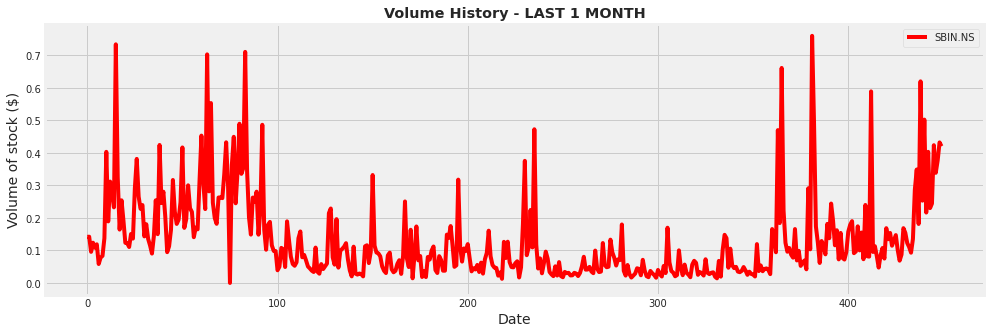

In [17]:
try:
    norm_dt_vol = [round(float(i) / max(dt_vol), 4) for i in dt_vol]
    norm_dt_vol[:5]
    # LAST 1 MONTHS CHART
    plt.figure(figsize=(15,5))
    plt.title('Volume History - LAST 1 MONTH', fontweight='bold')
    plt.plot(norm_dt_vol[-30*15:], label=stk_symbol[i_stk], color='r')
    plt.legend()
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume of stock ($)', fontsize=14)
    plt.show()
except ZeroDivisionError:
    print("Division by zero!")

## building model

In [18]:
import pandas

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
scaled_dt = scaler.fit_transform(pandas.DataFrame(dt))

In [21]:
scaled_dt[0:10]
type(scaled_dt)

numpy.ndarray

In [22]:
l = len(scaled_dt)
l

1874

In [23]:
r=int(l*0.7)
print(r)
train_data = (scaled_dt[0:r])
test_data  = (scaled_dt[r:])

1311


In [24]:
print(len(train_data))
print(type(test_data))

1311
<class 'numpy.ndarray'>


In [25]:
# convert an array of values into a dataset matrix
import numpy

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i+time_step:i+time_step+1])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 20
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [27]:
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(1290, 20, 1)
(1290, 1, 1)


In [28]:
# Reshape the data (we reshape only x data not y)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
x_train.shape
x_test.shape

(542, 20, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1290/1290 [==============================] - 42s 27ms/step - loss: 0.0029
Epoch 2/10
1290/1290 [==============================] - 22s 17ms/step - loss: 9.7093e-04
Epoch 3/10
1290/1290 [==============================] - 38s 29ms/step - loss: 8.7337e-04
Epoch 4/10
1290/1290 [==============================] - 23s 18ms/step - loss: 5.2555e-04
Epoch 5/10
1290/1290 [==============================] - 24s 18ms/step - loss: 5.1267e-04
Epoch 6/10
1290/1290 [==============================] - 34s 26ms/step - loss: 5.5880e-04
Epoch 7/10
1290/1290 [==============================] - 25s 19ms/step - loss: 4.6967e-04
Epoch 8/10
1290/1290 [==============================] - 21s 16ms/step - loss: 4.0928e-04
Epoch 9/10
1290/1290 [==============================] - 22s 17ms/step - loss: 4.5464e-04
Epoch 10/10
1290/1290 [==============================] - 21s 16ms/step - loss: 4.1930e-04


In [31]:
y_test[x_test.shape[0]-10:]

array([[[0.04273505]],

       [[0.01281999]],

       [[0.        ]],

       [[0.02350376]],

       [[0.02350376]],

       [[0.01495753]],

       [[0.04700882]],

       [[0.05555505]],

       [[0.06623881]],

       [[0.07692258]]])

In [32]:
# Get the models predicted price values 
predictions = model.predict(x_test)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMS-Error:",rmse)

17/17 [==============================] - 1s 16ms/step
RMS-Error: 0.20827961594162103


In [33]:
predictions.shape
# predictions

(542, 1)

In [61]:
predictions = scaler.inverse_transform(predictions)
predictions[:10]

array([[12655.113],
       [12660.304],
       [12660.882],
       [12663.451],
       [12663.246],
       [12664.679],
       [12659.648],
       [12658.009],
       [12659.428],
       [12656.69 ]], dtype=float32)

In [35]:
x_test.shape

(542, 20, 1)

In [36]:
const = r+time_step+1
print(const)

1332


In [37]:
valid = pandas.DataFrame(dt[const:l], columns=['StockName'])

In [38]:
valid['Predictions'] = predictions  
valid.set_index(np.arange(const,l,1))

,StockName,Predictions
1332,519.299988,519.295593
1333,519.400024,519.517395
1334,519.400024,519.542114
1335,519.450012,519.651917
1336,519.250000,519.643127
...,...,...
1869,504.700012,505.356232
1870,504.899994,505.216187
1871,505.149994,505.760376
1872,505.399994,505.929169


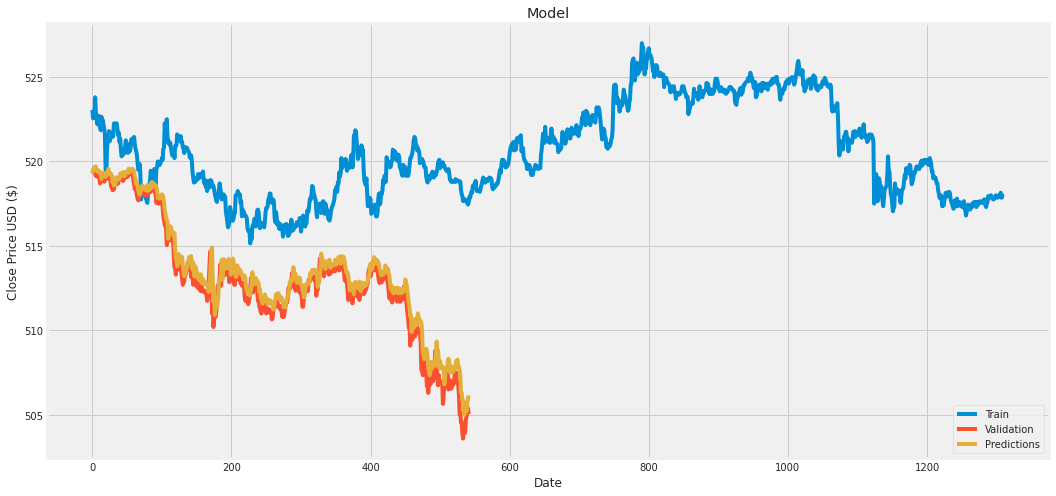

In [39]:
## plotting predictions along with validations
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(dt[0:r])
plt.plot(valid[['StockName', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

### predicting future price using the model

In [40]:
y_test.shape

(542, 1, 1)

In [41]:
p = model.predict(y_test)

17/17 [==============================] - 1s 3ms/step


In [42]:
p = scaler.inverse_transform(p)

In [43]:
p.tolist()
[x[0] for x in p.tolist()]

[518.2263793945312,
 518.2777099609375,
 518.3807373046875,
 518.3807373046875,
 518.4322509765625,
 518.2263793945312,
 518.1237182617188,
 518.175048828125,
 518.0723876953125,
 518.1237182617188,
 518.0723876953125,
 518.021240234375,
 517.6643676757812,
 517.8679809570312,
 517.8679809570312,
 518.021240234375,
 517.9700927734375,
 517.8679809570312,
 517.7659912109375,
 517.9700927734375,
 517.9190063476562,
 518.1237182617188,
 518.2777099609375,
 517.9700927734375,
 517.9700927734375,
 518.021240234375,
 517.9190063476562,
 517.8679809570312,
 517.4614868164062,
 517.562744140625,
 517.2594604492188,
 517.3099365234375,
 517.3099365234375,
 517.7151489257812,
 517.7151489257812,
 517.613525390625,
 517.613525390625,
 517.7659912109375,
 517.6643676757812,
 517.9700927734375,
 518.021240234375,
 517.9190063476562,
 517.9190063476562,
 518.0723876953125,
 517.8679809570312,
 517.8169555664062,
 517.8679809570312,
 518.0723876953125,
 518.021240234375,
 518.021240234375,
 518.07238

In [44]:
temp_dict = {"predictions":[x[0] for x in p.tolist()]}

In [45]:
temp_dict['predictions'][0]

518.2263793945312

In [46]:
tt = 480
ii = 1

In [47]:
temp_dict_df = pandas.DataFrame(temp_dict['predictions'][0:tt])
temp_dict_df

,0
0,518.226379
1,518.277710
2,518.380737
3,518.380737
4,518.432251
...,...
475,507.799377
476,507.528778
477,507.683075
478,507.877136


In [62]:
i1 = np.arange(0,tt,ii)
i1[:5]

array([0, 1, 2, 3, 4])

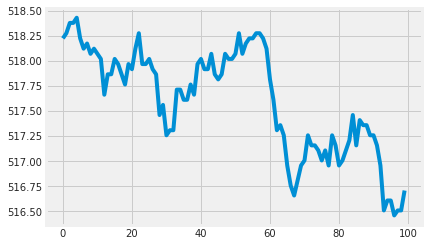

In [49]:
plt.plot(i1[0:100] , temp_dict_df[0:100])

In [50]:
stock_data['Adj Close']

Datetime
2023-03-20 09:15:00+05:30    523.049988
2023-03-20 09:16:00+05:30    522.549988
2023-03-20 09:17:00+05:30    522.799988
2023-03-20 09:18:00+05:30    522.849976
2023-03-20 09:19:00+05:30    523.799988
                                ...    
2023-03-24 15:25:00+05:30    504.700012
2023-03-24 15:26:00+05:30    504.899994
2023-03-24 15:27:00+05:30    505.149994
2023-03-24 15:28:00+05:30    505.399994
2023-03-24 15:29:00+05:30    505.049988
Name: Adj Close, Length: 1874, dtype: float64

# Bollinger Band

In [51]:
symbol = stk_symbol[i_stk]
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

In [52]:
#for 20 DMA with 2 std
def get_bollinger_bands(close_price_col, rate=20):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down


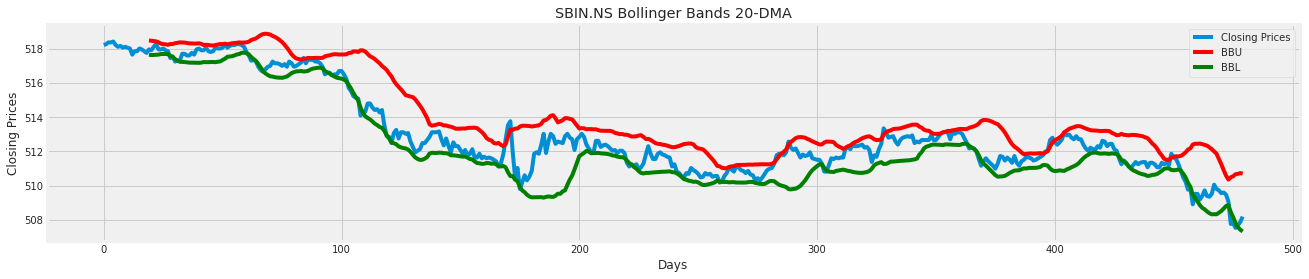

In [63]:
bollinger_up, bollinger_down = get_bollinger_bands(temp_dict_df)

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 20-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='red')
plt.plot(bollinger_down, label='BBL', c='green')
plt.legend()
plt.show()

In [64]:
#for 50 DMA with 2.5 std
def get_bollinger_bands_50(close_price_col, rate=50):
    sma = get_sma(close_price_col, rate)
    std = close_price_col.rolling(rate).std()
    bollinger_up = sma + std * 2.5
    bollinger_down = sma - std * 2.5
    return bollinger_up, bollinger_down


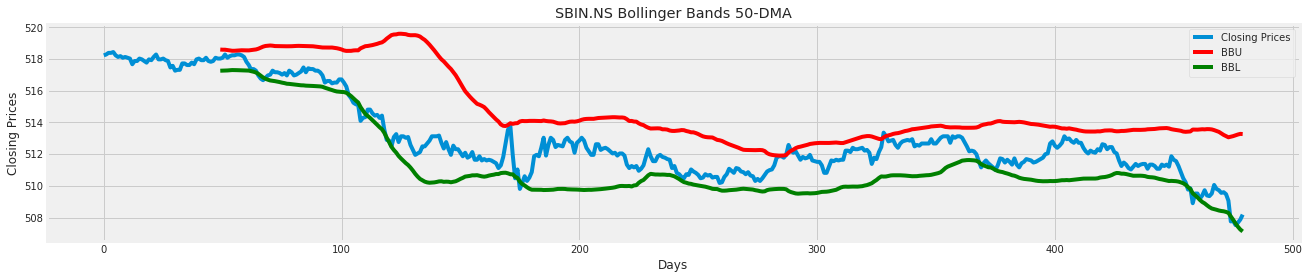

In [66]:
bollinger_up, bollinger_down = get_bollinger_bands_50(temp_dict_df)#.dropna()

plt.figure().set_figwidth(20)
plt.title(symbol + ' Bollinger Bands 50-DMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(temp_dict_df, label='Closing Prices')
plt.plot(bollinger_up, label='BBU', c='r')
plt.plot(bollinger_down, label='BBL', c='g')
plt.legend()
plt.show()

    when graph touches red line(bollinger UP)     -> sell
    when graph touches green line(bollinger DOWN) -> buy

In [116]:
# bollinger_down.rename(columns={0:'bbl'})
bollinger_down.fillna(value=1, axis=0, inplace=True)
bollinger_up.fillna(value=1, axis=0, inplace=True)

In [143]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data[0])):
        if (data[0][i] > lower_bb[0][i]) and (data[0][i] < lower_bb[0][i]):
            if signal != 1:
                buy_price.append(data[0][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[0][i] < upper_bb[0][i] and data[0][i] > upper_bb[0][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[0][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(temp_dict_df, bollinger_down, bollinger_up)

KeyError: ignored

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan



---



---



In [56]:
import datetime

In [57]:
bdown = bollinger_down.mean()
bup = bollinger_up.mean()
bdown,bup

(0    512.129895
 dtype: float64, 0    513.95845
 dtype: float64)

In [58]:
bollinger_down.fillna(value=bdown, inplace=True)
bollinger_up.fillna(value=bup, inplace=True)

In [70]:
print(bollinger_up.iloc[-1][0])
print(temp_dict_df.iloc[-1][0])
print(bollinger_down.iloc[-1][0])
msg1=''
if temp_dict_df.iloc[-1][0] > bollinger_up.iloc[-1][0]:
    msg1 = "buy signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)
if temp_dict_df.iloc[-1][0] < bollinger_down.iloc[-1][0]:
    msg1 = "sell signal - "+ symbol + " @ " + str(datetime.datetime.now())
    print(msg1)


513.2660380335054
508.1903991699219
507.13150347040084


In [74]:
import requests

def send_to_telegram(message):
    apiToken = "6227645743:AAFVdG3kyQDFbiQa3AHM8T05Rdu9BacDu2Y"
    chatID = "960358723"
    apiURL = f"https://api.telegram.org/bot{apiToken}/sendMessage?chat_id={chatID}&text={message}"

    try:
        response = requests.post(apiURL, chatID, message)
        print(response.text)
    except Exception as e:
        print(e)

if len(msg1)>0:
    send_to_telegram(msg1)

## RSI
The Relative Strength Index (RSI) is a momentum indicator that describes the current price relative to average high and low prices over a previous trading period. This indicator estimates overbought or oversold status and helps spot trend reversals, price pullbacks, and the emergence of bullish or bearish markets.

# MACD
Moving average convergence/divergence (MACD, or MAC-D) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.
The result of that calculation is the MACD line. A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals. Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line.

In [75]:
def get_macd(df, slow, fast, smooth):
    exp1 = df.ewm(span = fast, adjust = False).mean()
    exp2 = df.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns={'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns={'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df


In [76]:

stk_macd = get_macd(stock_data, 26, 12, 9)
stk_macd.tail()

,Open,High,Low,macd,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,Open,High,Low,signal,Adj Close,Volume,MA for 50 days,MA for 200 days,Daily Return,hist
Datetime,,,,,,,,,,,,,,,,,,,
2023-03-24 15:25:00+05:30,-0.862238,-0.821699,-0.842253,-0.792979,-0.792979,18791.732653,-0.378345,-0.238974,0.000110,-0.640924,-0.656556,-0.657295,-0.672730,-0.672730,16216.197082,-0.394832,-0.220146,-0.000060,-0.120249
2023-03-24 15:26:00+05:30,-0.821305,-0.774894,-0.794379,-0.724463,-0.724463,18425.554893,-0.376866,-0.243933,0.000136,-0.677000,-0.680224,-0.684712,-0.683076,-0.683076,16658.068645,-0.391239,-0.224904,-0.000020,-0.041387
2023-03-24 15:27:00+05:30,-0.751954,-0.701472,-0.707932,-0.642584,-0.642584,18963.329527,-0.374921,-0.248489,0.000162,-0.691991,-0.684473,-0.689356,-0.674978,-0.674978,17119.120821,-0.387975,-0.229621,0.000016,0.032394
2023-03-24 15:28:00+05:30,-0.669107,-0.623988,-0.616180,-0.551168,-0.551168,20696.032393,-0.371678,-0.252378,0.000181,-0.687414,-0.672376,-0.674721,-0.650216,-0.650216,17834.503135,-0.384716,-0.234172,0.000049,0.099048
2023-03-24 15:29:00+05:30,-0.584608,-0.556171,-0.561205,-0.501185,-0.501185,21494.235124,-0.368332,-0.255879,0.000099,-0.666853,-0.649135,-0.652018,-0.620410,-0.620410,18566.449533,-0.381439,-0.238513,0.000059,0.119225


In [77]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(dt, stk_macd)

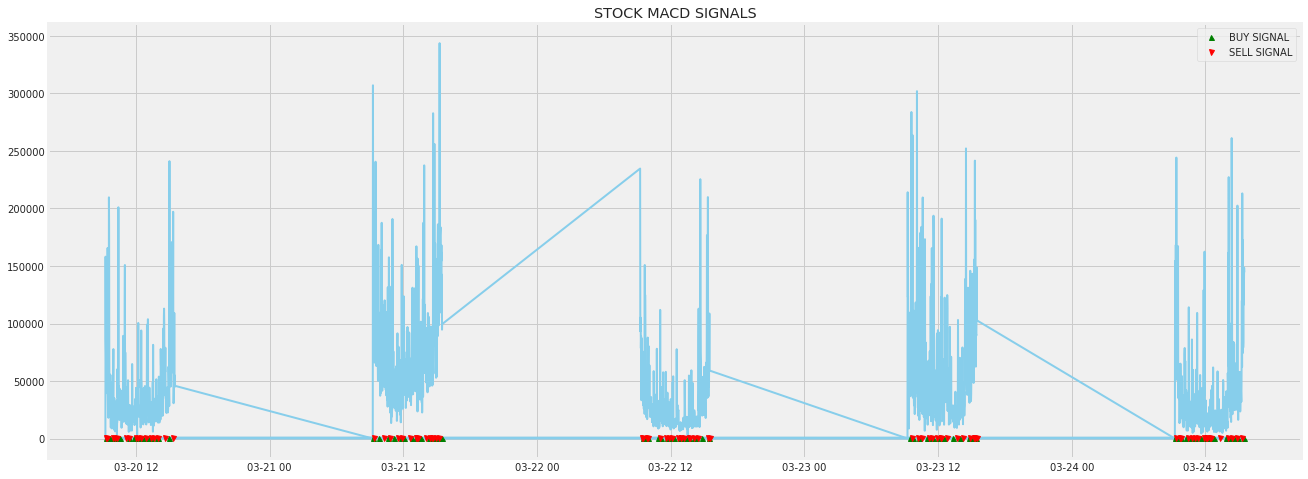

In [80]:
## macd signal plot
plt.figure(figsize=(20,8))
plt.plot(stock_data, color = 'skyblue', linewidth = 2)
plt.plot(stk_macd.index, buy_price, marker = '^', color = 'g', markersize = 5, label = 'BUY SIGNAL', linewidth = 0)
plt.plot(stk_macd.index, sell_price, marker = 'v', color = 'r', markersize = 5, label = 'SELL SIGNAL', linewidth = 0)
plt.title('STOCK MACD SIGNALS')
plt.legend()
plt.show()


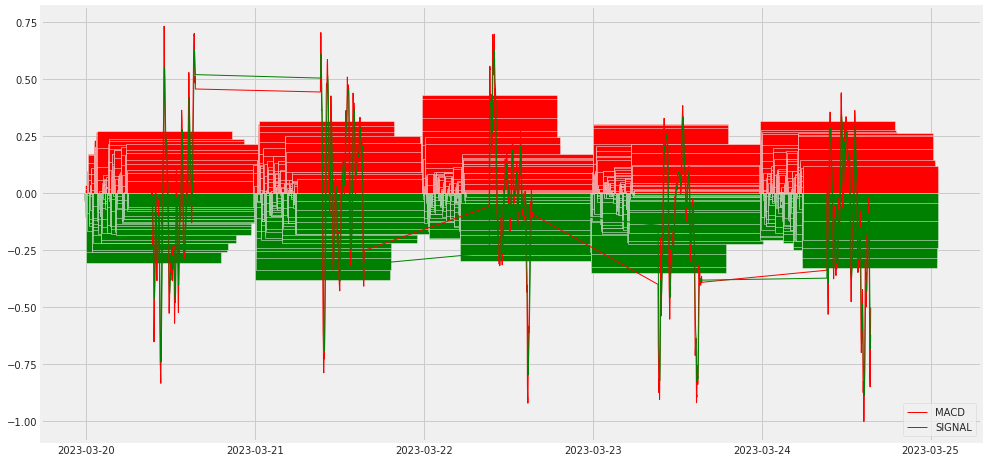

In [81]:
## macd VS signal plotr
plt.figure(figsize=(15,8))
plt.plot(stk_macd['macd'], color = 'red', linewidth = 1, label = 'MACD')
plt.plot(stk_macd['signal'], color = 'green', linewidth = 1, label = 'SIGNAL')

for i in range(len(stk_macd)):
    if str(stk_macd['hist'][i])[0] == '-':
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'green')
    else:
        plt.bar(stk_macd.index[i], stk_macd['hist'][i], color = 'red')

plt.legend(loc = 'lower right')
plt.show()